# Agenda

Introduction to Decision Trees
- Regression Trees

  - Interpret the tree diagram

  - Prediction out-of samples data

- Classification Trees

  - Classification metrics

# Introduction to Decision Trees


|-|continuous|categorical|
|---|---|---|
|**supervised**|**regression**|**classification**|
|**unsupervised**|dimension reduction|clustering|

## Regression trees vs Classification Trees

Classification trees are very similar to regression trees. Here is a quick comparison:

|regression trees|classification trees|
|---|---|
|predict a continuous response|predict a categorical response|
|predict using mean response of each leaf|predict using most commonly occuring class of each leaf|
|splits are chosen to minimize MSE|splits are chosen to minimize a different criterion (discussed below)|

## Regression trees

Let's look at a simple example to motivate our learning.

Our goal is to **predict a baseball player's Salary** based on **Years** (number of years playing in the major leagues) and **Hits** (number of hits he made in the previous year). Here is the training data, represented visually (low salary is blue/green, high salary is red/yellow):

<img src="figures/07.01_salary_color.png">

**How might you "stratify" or "segment" the feature space into regions, based on salary?** Intuitively, you want to **maximize** the similarity (or "homogeneity") within a given region, and **minimize** the similarity between different regions.

Below is a regression tree that has been fit to the data by a computer. (We will talk later about how the fitting algorithm actually works.) Note that  Salary is measured in thousands and has been log-transformed.

<img src="figures/07.02_salary_tree.png">

**How do we make Salary predictions (for out-of-sample data) using a decision tree?**

- Start at the top, and examine the first "splitting rule" (Years < 4.5).
- If the rule is True for a given player, follow the left branch. If the rule is False, follow the right branch.
- Continue until reaching the bottom. The predicted Salary is the number in that particular "bucket".
- *Side note:* Years and Hits are both integers, but the convention is to label these rules using the midpoint between adjacent values.

Examples predictions:

- Years=3, then predict 5.11 ($\$1000 \times e^{5.11} \approx \$166000$)
- Years=5 and Hits=100, then predict 6.00 ($\$1000 \times e^{6.00} \approx \$403000$)
- Years=8 and Hits=120, then predict 6.74 ($\$1000 \times e^{6.74} \approx \$846000$)

**How did we come up with the numbers at the bottom of the tree?** Each number is just the **mean Salary in the training data** of players who fit that criteria. Here's the same diagram as before, split into the three regions:

<img src="figures/07.03_salary_regions.png">

This diagram is essentially a combination of the two previous diagrams (except that the observations are no longer color-coded). In $R_1$, the mean log Salary was 5.11. In $R_2$, the mean log Salary was 6.00. In $R_3$, the mean log Salary was 6.74. Thus, those values are used to predict out-of-sample data.

Let's introduce some terminology:

<img src="figures/07.04_salary_tree_annotated.png">

**How might you interpret the "meaning" of this tree?**

- Years is the most important factor determining Salary, with a lower number of Years corresponding to a lower Salary.
- For a player with a lower number of Years, Hits is not an important factor determining Salary.
- For a player with a higher number of Years, Hits is an important factor determining Salary, with a greater number of Hits corresponding to a higher Salary.

What we have seen so far hints at the advantages and disadvantages of decision trees:

**Advantages:**

- Highly interpretable
- Can be displayed graphically
- Prediction is fast

**Disadvantages:**

- Predictive accuracy is not as high as some supervised learning methods
- Can easily overfit the training data (high variance)

## How does a computer build a regression tree?

The ideal approach would be for the computer to consider every possible partition of the feature space. However, this is computationally infeasible, so instead an approach is used called **recursive binary splitting:**

- Begin at the top of the tree.
- For every single predictor, examine every possible cutpoint, and choose the predictor and cutpoint such that the resulting tree has the **lowest possible mean squared error (MSE)**. Make that split.
- Repeat the examination for the two resulting regions, and again make a single split (in one of the regions) to minimize the MSE.
- Keep repeating this process until a stopping criteria is met.

**How does it know when to stop?**

1. We could define a stopping criterion, such as a **maximum depth** of the tree or the **minimum number of samples in the leaf**.
2. We could grow the tree deep, and then "prune" it back using a method such as "cost complexity pruning" (aka "weakest link pruning").

Method 2 involves setting a tuning parameter that penalizes the tree for having too many leaves. As the parameter is increased, branches automatically get pruned from the tree, resulting in smaller and smaller trees. The tuning parameter can be selected through cross-validation.

Note: **Method 2 is not currently supported by scikit-learn**, and so we will use Method 1 instead.

Here's an example of an **unpruned tree**, and a comparison of the training, test, and cross-validation errors for trees with different numbers of leaves:

<img src="figures/07.05_salary_unpruned.png">

As you can see, the **training error** continues to go down as the tree size increases, but the lowest **cross-validation error** occurs for a tree with 3 leaves.

## Building a regression tree in scikit-learn

### Step 1.1. Read the Data

In [1]:
# import pandas
import pandas as pd

# read in vehicle data
vehicles = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT4/master/data/used_vehicles.csv')

# print out data
vehicles

,price,year,miles,doors,type
0,22000,2012,13000,2,car
1,14000,2010,30000,2,car
2,13000,2010,73500,4,car
3,9500,2009,78000,4,car
4,9000,2007,47000,4,car
5,4000,2006,124000,2,car
6,3000,2004,177000,4,car
7,2000,2004,209000,4,truck
8,3000,2003,138000,2,car
9,1900,2003,160000,4,car


### Step 1.2. Convert categorical features into numerical

In [2]:
# convert car to 0 and truck to 1
vehicles['type'] = vehicles.type.map({'car':0, 'truck':1})
# map : convert categorical to numerical

Let the features be:
- year
- miles
- doors
- type (converted from categorical to numerical)

The target (response) is:
- price

### Step 1.3. Select Features and Response

In [3]:
# select feature columns (every column except for the 0th column)
feature_cols = vehicles.columns[1:] # 2열부터~ 라는 뜻

# df1 = data.reindex(columns = ['',])
# 만약에 원하는 순서대로 뽑아내려면(ex) price가 중간에 있으면)

# define X (features) and y (response)
X = vehicles[feature_cols]
y = vehicles.price

### Step 1.4. Split into train & test data

In [4]:
# split into train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1) #0.7 - 0.3 // (X,y,test_size=0.5)적으면 바꿔짐

In [5]:
# print out each of the arrays
print(X_train) # 5개
print(y_train) # 5개
# 70% for training data set

    year   miles  doors  type
10  2003  190000      2     1
4   2007   47000      4     0
1   2010   30000      2     0
12  1999  163000      2     1
0   2012   13000      2     0
13  1997  138000      4     0
9   2003  160000      4     0
8   2003  138000      2     0
11  2001   62000      4     0
5   2006  124000      2     0
10     2500
4      9000
1     14000
12     1800
0     22000
13     1300
9      1900
8      3000
11     5000
5      4000
Name: price, dtype: int64


In [6]:
print(X_test)
print(y_test)
# 30% for testing data set

   year   miles  doors  type
3  2009   78000      4     0
7  2004  209000      4     1
6  2004  177000      4     0
2  2010   73500      4     0
3     9500
7     2000
6     3000
2    13000
Name: price, dtype: int64


### Step 1.5. Use one classifier (in this case, we use Decision Tree Regressor)

In [7]:
# import class, instantiate estimator, fit with training set
# the first 10 random data
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)
treereg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

### Step 1.6. Test the model with test data (prediction)

In [8]:
# the remaining 4 random data for testing
# make predictions
preds = treereg.predict(X_test)

# print predictions and actual values
print(preds)
print(y_test)

[5000. 1900. 1900. 5000.]
3     9500
7     2000
6     3000
2    13000
Name: price, dtype: int64


### Step 1.7. Measure the performance (For regression, we can use RMSE)

In [9]:
# print RMSE (Root Mean Squared Error)
from sklearn import metrics
import numpy as np
np.sqrt(metrics.mean_squared_error(y_test, preds)) # testing data의 y_test, prediction data의 pred의 평균제곱오차
# testing data & prediction data

4622.4993239588475

## Model Selection - based on Root Mean Squared Error (RMSE) with depth parameter
Root Mean Squared Error is one of the metric to select the best model of DecisionTreeRegressor.

For generating other models, we can choose different depth parameter. Let we use the depth from 2 - 4 and check the RMSE.
The minimum RMSE (the least errors) can be selected as the best model.

In [10]:
# use cross-validation to find best max_depth
from sklearn.model_selection import cross_val_score

In [11]:
# try max_depth=2
# the score is obtained using cross-validation method (equals to 3) and the score method is neg_MSE
treereg = DecisionTreeRegressor(max_depth=2, random_state=1)
scores = cross_val_score(treereg, X, y, cv=3, scoring='neg_mean_squared_error') #RMSE #cv(cross validatopm):3 # 평균 제곱 오차 : 오차의 제곱에 대한 평균
np.mean(np.sqrt(-scores)) # result가 -니까 +만들어주기 위해

4804.376788842713

In [12]:
# try max_depth=3
treereg = DecisionTreeRegressor(max_depth=3, random_state=1) # parameter depth를 3에서 2로 바꿈
scores = cross_val_score(treereg, X, y, cv=3, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

4592.155425575525

In [13]:
# try max_depth=4
treereg = DecisionTreeRegressor(max_depth=4, random_state=1) # parameter depth를 4로 바꿈
scores = cross_val_score(treereg, X, y, cv=3, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

4704.005269479739

In [14]:
# max_depth=3 was best(가장 작은 숫자), so fit a tree using that parameter with ALL DATA
# parameter가 어떤 걸 선택할 것인가?
treereg = DecisionTreeRegressor(max_depth=3, random_state=1) # treelag : model that you get
treereg.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=1)

In [15]:
# compute the "Gini importance" of each feature: the (normalized) total reduction of MSE brought by that feature
# Gini index? 같음
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_}) # column importance임(higher value, higher importance)
# year is the best feature to distinguish the 'price'(feature_importance가 가장 높으므로)
# second best는 miles이다
# 0인 것은 별로 중요하지 않은 것

,feature,importance
0,year,0.798744
1,miles,0.201256
2,doors,0.000000
3,type,0.000000


### Create the visual tree

In [16]:
# create a Graphviz file
from sklearn.tree import export_graphviz # graphviz : graphical visualization
with open("07_vehicles.dot", 'w') as f: # w : write - I'm going to write file which names '07_vehicles.dot'
    f = export_graphviz(treereg, out_file=f, feature_names=feature_cols) # out_file : export the file

# at the command line, run this to convert to PNG:
# dot -Tpng 07_vehicles.dot -o tree.png
# Alternatively, you can search on the browser "graphviz online"
# Afterward, open the file "07_vehicles.dot" in a Word software
# copy and paste the text into the browser for "graphviz online"

In [17]:
!pip install opencv-python
!conda install python-graphviz

Solving environment: ...working... done

# All requested packages already installed.



In [18]:
! dot -Tpng 07_vehicles.dot -o tree.png

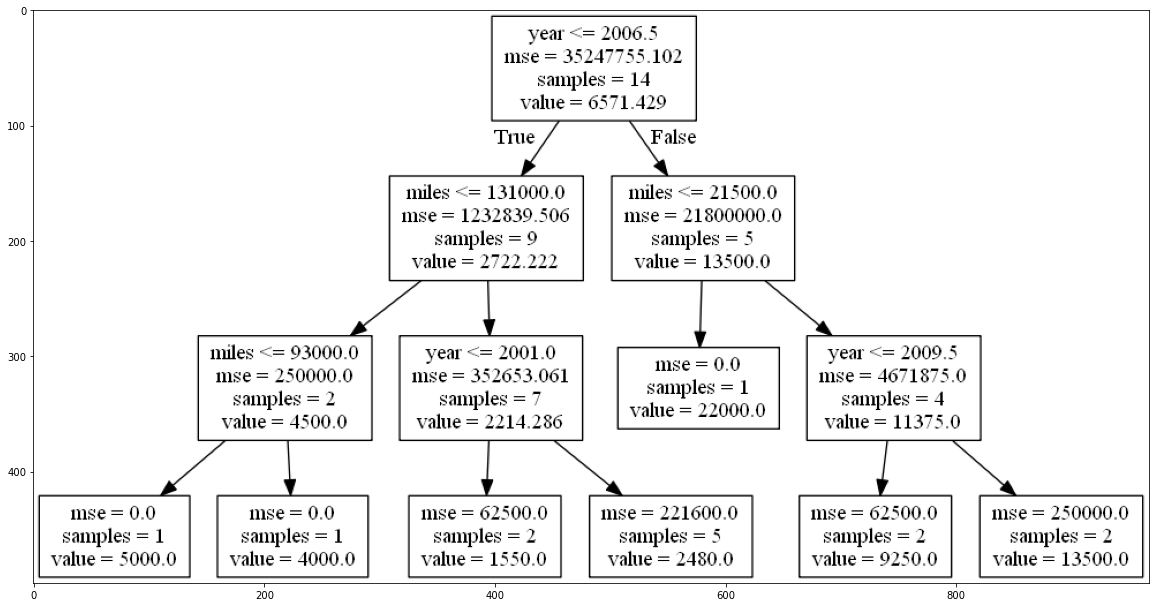

In [19]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)

sample 개수가 1개 이상이면 mse의 값이 생김 (왜냐면 그 sample들을 distinguish 해주기 위해)
 /sample 개수가 1이면 mse는 0

In [20]:
# sample : 분할하기 전에 해당 노드에 있는 관측치 수
# mse : 해당 노드의 실제 반응 값을 해당 노드의 평균 반응 값과 비교하여 계산된 평균 제곱 오차
# 첫번째 줄 : 해당 노드를 분할하는 데 사용되는 조건이다(참일 경우 왼쪽으로 이동, 거짓일 경우 오른쪽으로 이동)

In [21]:
# "sample"는 해당 노드의 관측치 수입니다.
# "value"은 해당 노드의 평균 반응 값이다.
# "mse"는 해당 노드의 실제 반응 값을 "값"과 비교하여 계산된 평균 제곱 오차이다.

## Interpreting a tree diagram

How do we read this decision tree?

**Internal nodes:**

- "samples" is the number of observations in that node before splitting
- "mse" is the mean squared error calculated by comparing the actual response values in that node against the mean response value in that node
- first line is the condition used to split that node (go left if true, go right if false)

**Leaves:**

- "samples" is the number of observations in that node
- "value" is the mean response value in that node
- "mse" is the mean squared error calculated by comparing the actual response values in that node against "value"

## Predicting for out-of-sample data (OOS)

How accurate is scikit-learn's regression tree at predicting the out-of-sample data?

In [22]:
# sample에서 몇개 빼놓고 예측하는 것

In [23]:
# read in out-of-sample data
oos = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT4/master/data/used_vehicles_oos.csv')
oos

,price,year,miles,doors,type
0,3000,2003,130000,4,truck
1,6000,2005,82500,4,car
2,12000,2010,60000,2,car


In [24]:
# convert car to 0 and truck to 1
oos['type'] = oos.type.map({'car':0, 'truck':1})

# print data
oos

,price,year,miles,doors,type
0,3000,2003,130000,4,1
1,6000,2005,82500,4,0
2,12000,2010,60000,2,0


In [25]:
# define X and y
# split x and y
X_oos = oos[feature_cols]
y_oos = oos.price

In [26]:
# make predictions on out-of-sample data
# x will be used for prediction
preds = treereg.predict(X_oos)

# print predictions 
print(preds)

[ 4000.  5000. 13500.]


In [27]:
# print actual values
# y is actual values
print(y_oos.values)

[ 3000  6000 12000]


In [28]:
# print RMSE
np.sqrt(metrics.mean_squared_error(y_oos, preds))
# this data is not included training set

1190.2380714238084

In [29]:
# print RMSE for the tree you created!
# to more understand prediction
your_preds = [4000, 5000, 13500]
np.sqrt(metrics.mean_squared_error(y_oos, your_preds))

1190.2380714238084

## Classification trees

Classification trees are very similar to regression trees. The comparison is revisited:

|regression trees|classification trees|
|---|---|
|predict a continuous response|predict a categorical response|
|predict using mean response of each leaf|predict using most commonly occuring class of each leaf|
|splits are chosen to minimize MSE|splits are chosen to minimize a different criterion (discussed below)|

Note that classification trees easily handle **more than two response classes**! (How have other classification models we've seen handled this scenario?)

Here's an **example of a classification tree**, which predicts the iris flower (setosa, virginica, versicolor) based on the features:

<img src="figures/07.06_classification_tree.png">

In [152]:
# 37 - setosa,34-virginica, 41-versicolor
# [37,0,0],setosa : all of them is setosa
# gini : a value to understand the spliting condition
# petal length <= 4.95 + gini = 0.496 -> petal length is good for spliting
# samples = 37 + samples 75 = 112
# value = [0,33,3] -> domimant is versicolor(33), 3 is virginica -> error 생김 (하나빼고 다른게 다 0이면 error 안생김)
# value = [0,1,38] -> dominant is virginica(38), 1 is versicolor 

## Splitting criteria for classification trees

Here are common options for the splitting criteria:

- **classification error rate:** fraction of training observations in a region that don't belong to the most common class
- **Gini index:** measure of total variance across classes in a region(highest gini is best splitting point)
- **cross-entropy:** numerically similar to Gini index, but uses logarithms

Which to use?

- When growing a tree, Gini index and cross-entropy are better measures of "node purity" than classification error rate. The Gini index is faster to compute than cross-entropy, so it is generally preferred (and is used by scikit-learn by default).
- When pruning a tree, classification error rate is preferable in order to maximize predictive accuracy.

Why do some splits result in leaves with the same predicted class?

- The split was performed to increase node purity, even though it didn't reduce the classification error.
- Node purity is important because we're interested in the class proportions among the observations in each region.

In [5]:
# classification error rate: 가장 일반적인 클래스에 속하지 않는 지역에서 training 관찰의 일부
# Gini index: 한 지역의 계층 간 총 분산 측정값(가장 높은 지니계수는 분할점)
# cross-entropy: 숫자로 지니수와 유사하지만 로그 사용

## Handling categorical predictors

Some implementations of classification trees will allow you to handle categorical predictors **without creating dummy variables**. When splitting on a categorical predictor, they will try splitting on **every possible combination of categories** to find the best split. In the example above, "ChestPain:bc" means that the left-hand branch consists of observations with the second and third ChestPain categories, and the right-hand branch consists of remaining observations.

**Unfortunately, scikit-learn's classification tree implementation does not support this approach.** Instead, here's how you can handle categorical predictors:

- If a predictor only has **two possible values**, code it as a single binary variable (0 or 1). Since it's treated as a number, splits will naturally occur at 0.5.
- If a predictor has **three or more possible values that are ordered**, code it as a single variable (1, 2, 3, etc). Splits will naturally occur at 1.5, 2.5, etc.
- If a predictor has **three or more possible values that are unordered**, create dummy variables and drop one level as usual. The decision tree won't know that the dummy variables are related to one another, but that shouldn't matter in terms of predictive accuracy.( 결정 트리는 더미 변수가 서로 연관되어 있다는 것을 알지 못하지만, 예측 정확도 측면에서 중요하지 않다)
- If a predictor has **thousands of possible unordered values**, then it may be best to code it as a single variable (1, 2, 3, etc) instead of using dummy variables to minimize the size of the resulting model. ([reference](http://stackoverflow.com/a/18736132/1636598))

We'll see examples of these strategies below.

## Building a classification tree in scikit-learn

We'll build a classification tree using the [Titanic data](https://www.kaggle.com/c/titanic-gettingStarted/data) provided by Kaggle.

In [61]:
# read in the data
titanic = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT4/master/data/titanic.csv')
titanic.head(10)
# 0 : not survived , 1 : survived
# sibsp : has sibiling or not
# parsh : has parent or not
# cabin : cabin number
# embarked : port where the passenger start to sail

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [62]:
# look for missing values
titanic.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

Let's choose our response and a few features, and decide whether we need to adjust them:

- **survived:** This is our response, and is already encoded as 0=died and 1=survived.
- **pclass:** These are the passenger class categories (1=first class, 2=second class, 3=third class). They are ordered, so we'll leave them as-is.
- **sex:** This is a binary category, so we should encode as 0=female and 1=male.
- **age:** We need to fill in the missing values.
- **embarked:** This is the port they embarked from. There are three unordered categories, so we'll create dummy variables.

In [63]:
# encode sex feature
titanic['sex'] = titanic.sex.map({'female':0, 'male':1})

# fill in missing values for age
titanic.age.fillna(titanic.age.mean(), inplace=True)

# print the updated DataFrame
titanic.head(10)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,NaN,C


In [64]:
# create three dummy variables using get_dummies
pd.get_dummies(titanic.embarked, prefix='embarked').head(10)

,embarked_C,embarked_Q,embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


In [65]:
# create three dummy variables, drop the first dummy variable, and store this as a DataFrame
embarked_dummies = pd.get_dummies(titanic.embarked, prefix='embarked').iloc[:, 1:]

# concatenate the two dummy variable columns onto the original DataFrame
# note: axis=0 means rows, axis=1 means columns
titanic = pd.concat([titanic, embarked_dummies], axis=1)

# print the updated DataFrame
titanic.head(10)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,embarked_Q,embarked_S
0,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C,0,0
2,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S,0,1
4,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S,0,1
5,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,NaN,Q,1,0
6,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,S,0,1
7,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,NaN,S,0,1
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,347742,11.1333,NaN,S,0,1
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,NaN,C,0,0


In [66]:
# create a list of feature columns
feature_cols = ['pclass', 'sex', 'age', 'embarked_Q', 'embarked_S']

# define X and y
X = titanic[feature_cols]
y = titanic.survived

In [67]:
# fit a classification tree with max_depth=3 on all data, DecisionTreeRegressior(유사)
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [68]:
# create a Graphviz file
with open("07_titanic.dot", 'w') as f:
    f = export_graphviz(treeclf, out_file=f, feature_names=feature_cols)

In [69]:
! dot -Tpng 07_titanic.dot -o titanictree.png

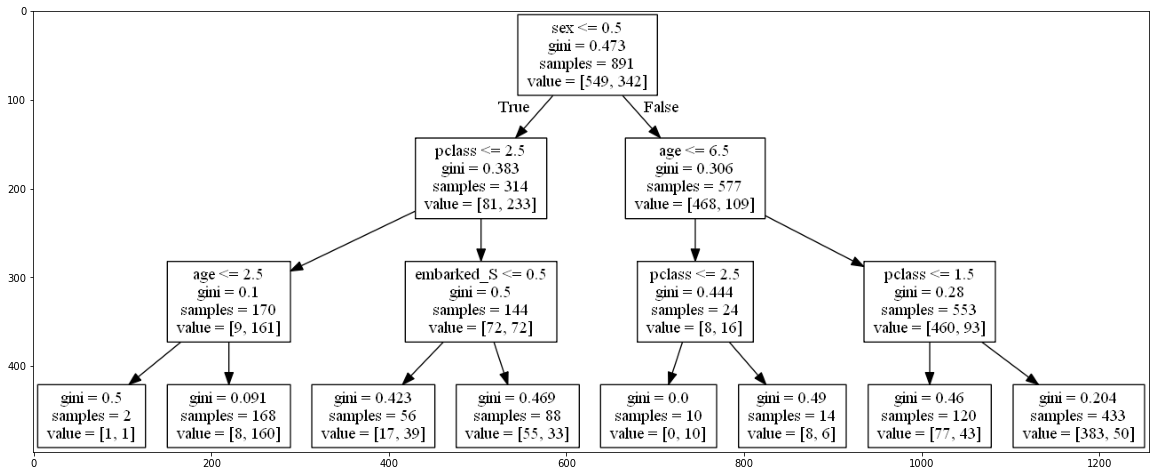

In [70]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('titanictree.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)

Notice the split in the bottom right, which was made only to increase node purity.(불순도-> 복잡성이 가장 낮게)

In [71]:
# compute the feature importances
# embarked : departure of port
pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_})

,feature,importance
0,pclass,0.242664
1,sex,0.655584
2,age,0.064494
3,embarked_Q,0.000000
4,embarked_S,0.037258


importance 높을수록 good spliting point

### Split the data into training and test data

In [72]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

### Use "Decision Tree Classifier"

In [75]:
# Create Decision Tree classifer object
treeclf2 = DecisionTreeClassifier()

# Train Decision Tree Classifer
treeclf2 = treeclf2.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = treeclf2.predict(X_test)

### In classification, there are many matrix. To get accuracy, we use this following code:

In [76]:
# Model Accuracy, how often is the classifier correct?
# accuracy : how good this model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) # the result form actual values VS the result from prediction

Accuracy: 0.7574626865671642


### The accuracy can be obtained after finding the confusion matrix.

In [79]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
#True positive(TP) : 129
#True negative(TN) : 73
#False positive(FT) : 24
#False negative(FN) : 42

[[130  23]
 [ 42  73]]


### The classification report showed all important performance metrics

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
# gap between the test data and prediction data

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       153
           1       0.76      0.63      0.69       115

    accuracy                           0.76       268
   macro avg       0.76      0.74      0.75       268
weighted avg       0.76      0.76      0.75       268



recall : precision of positive

<img src="figures/07.07_confusion_matrix.png">

True positive, True negative가 높은게 좋은것

Classification :



|-|1|0|
|---|---|---|
|1| A|B|
|0|C|D|


True Positive, False Positive, True Negative, False Negative Above, these are A, C, D, and B respectively.

             
| pred \ actual     | Yes | No|
|-----------|--------|--------|
| Yes     |  9     |  2     |
| No    |  3     |  3     |


**Accuracy** is the percentage of correctly classifies instances out of all instances. It is more useful on a binary classification than multi-class classification problems because it can be less clear exactly how the accuracy breaks down across those classes (e.g. you need to go deeper with a confusion matrix). 

$\frac{((A+D)}{Total}$   = (9+3) / 17 = 0.7059

no information rate is the average loss of the variables over all combinations of the response.

**ROC metrics** are only suitable for binary classification problems (e.g. two classes).
To calculate ROC information, you must change the summaryFunction in your trainControl to be twoClassSummary. This will calculate the Area Under ROC Curve (AUROC) also called just Area Under curve (AUC), sensitivity and specificity.
ROC is actually the area under the ROC curve or AUC. The AUC represents a models ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predicts perfectly. An area of 0.5 represents a model as good as random.

ROC can be broken down into *sensitivity* and *specificity*. A binary classification problem is really a trade-off between sensitivity and specificity.

**Sensitivity** is the true positive rate also called the **Recall**. It is the number instances from the positive (first) class that actually predicted correctly. High sensitivity would suggest a low type II error rate (see below), or high statistical power. Also known as true positive rate. 

$\frac{((A)}{(A + B)}$ = 9 / (9+3) = 0.75

**Specificity** is also called the true negative rate. Is the number of instances from the negative class (second) class that were actually predicted correctly. High specificity would suggest a low type I error rate (see below). Also known as true negative rate. 

$\frac{((D)}{(D + C)}$ = 3 / (3 + 2) = 0.6

**Positive Predictive Value (PPV)**, called as **Precision** proportion of true positives of those that are predicted positives: 

$\frac{((A)}{(A + C)}$

In the above example this would be 9/(9+2), about 0.8182.

**Negative Predictive Value (NPV)** proportion of true negatives of those that are predicted negative: 

$\frac{((D)}{(B + D)}$ In the above example, this would be 3 / (3+3) = 0.5


Alternative metrics

**Lift Ratio** of positive predictions given actual positives to the proportion of positive predictions out of the total: (A/(A+C))/((A+B)/Total). In the above example this would be (9/(9+3))/((9+2)/17)) or 1.1591.

**F Score (F1 score)** Harmonic mean of precision and recall: 2(PrecisionRecall)/(Precision+Recall). In the above example this would be 2(.8182.75)/(.8182+.75). Also known as F1 score.

**Type I Error Rate (false positive rate)** proportion of true negatives that are incorrectly predicted positive: B/B+D. In the above example this would be 2/5, about 0.6. Also known as alpha.

**Type II Error Rate (false negative rate)** proportion of true positives that are incorrectly predicted negative: C/C+A. In the above example this would be 3/12, about 0.25. Also known as beta.

**Prevalence**  (A+C) / (A + B + C + D) (9+3) / 17 = 0.7059

**Detection Rate** (A) / total 9 / 17 = 0.5294

**Detection Prevalence** (A + B) / total 11 / 17 = 0.6471

**Balanced Accuracy** (Sensitivity + specificity) / 2 (0.6 + 0.75) / 2 = 0.675


## Wrapping up decision trees

Here are some advantages and disadvantages of decision trees that we haven't yet talked about:

**Advantages:**

- Can be specified as a series of rules, and are thought to more closely approximate human decision-making than other models
- Non-parametric (will do better than linear regression if relationship between predictors and response is highly non-linear)->비선형일때 더 효과적

<img src="figures/07.08_linear_vs_tree.png">

**Disadvantages:**

- Small variations in the data can result in a completely different tree(작은 변화로 트리가 완전히 달라질 수 있음)
- Recursive binary splitting makes "locally optimal" decisions that may not result in a globally optimal tree(로컬하게 최적, 완전 최적 아님)
- Can create biased trees if the classes are highly imbalanced(편향된 트리될 수 있음)

Note that there is not just one decision tree algorithm; instead, there are many variations. A few common decision tree algorithms that are often referred to by name are C4.5, C5.0, and CART. (More details are available in the [scikit-learn documentation](http://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart).) scikit-learn uses an "optimized version" of CART.

data small : imbalanced

## Resources

- scikit-learn documentation: [Decision Trees](http://scikit-learn.org/stable/modules/tree.html)

- *Adapted from Chapter 8 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)*